Speciific requirements for the report
Each group will create a final electronic report (max 2000 written words, not including citations) using Jupyter to communicate the question asked, the analysis performed and the conclusion reached.

**Title:** Apple Production Data Analysis

**Introduction:**
- Over the last two decades, food production has increased and evolved to accommodate the exponential increase in the world population. In turn, this situation resulted in an alarming rise in food waste. Currently, around one-third of the total food production goes to waste and 45% of this accounts for fruits and vegetables. Being able to understand the factors and conditions that contribute to harvesting better quality produce allows farmers and producers to optimize their cultivation process which can greatly improve their yield. Analyzing  trends and patterns in  recent data also benefits production companies looking to increase their profits and ensure customer satisfaction.

- In this project, we aimed to answer the question: Is there a way to predict whether a newly harvested apple shows an overall ‘good’ or ‘bad’ quality using a particular set of variables?

- To answer our question, we analyzed  the ‘Apple Quality’ dataset from Kaggle. It is a robust datset that contains information about the apple production of an Amerian agriculture company. The data is composed of 9 columns that divide the various components of a fruit including its size, weight, acidity, etc.

**Methods & Results:**

-describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.

-your report should include code which:

    -loads data from the original source on the web 
    -wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
    -performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
    -creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    -performs the data analysis
    -creates a visualization of the analysis 
    
note: all tables and figure should have a figure/table number and a legend

- Loading libraries


In [5]:
library(repr)
library(tidyverse)
library(tidymodels)
library(readxl)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

- Reading files from the web

In [6]:
download.file("https://raw.githubusercontent.com/Dana-Te/DSCI-100-G41-Apples-Data-Set/main/apple_quality.csv", "apple_quality.csv")
Apple_data<- read_csv("apple_quality.csv")
Apple_data

Rows: 4001 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Acidity, Quality
dbl (7): A_id, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0,-3.97004852,-2.5123364,5.3463296,-1.01200871,1.8449004,0.32983980,-0.491590483,good
1,-1.19521719,-2.8392565,3.6640588,1.58823231,0.8532858,0.86753008,-0.722809367,good
2,-0.29202386,-1.3512820,-1.7384292,-0.34261593,2.8386355,-0.03803333,2.621636473,bad
3,-0.65719577,-2.2716266,1.3248738,-0.09787472,3.6379705,-3.41376134,0.790723217,good
4,1.36421682,-1.2966119,-0.3846582,-0.55300577,3.0308744,-1.30384943,0.501984036,good
5,-3.42539975,-1.4090822,-1.9135112,-0.55577486,-3.8530715,1.91461592,-2.981523169,bad
6,1.33160574,1.6359557,0.8759742,-1.67779794,3.1063445,-1.84741673,2.414170509,good
7,-1.99546210,-0.4289585,1.5306436,-0.74297168,0.1588340,0.97443786,-1.470125066,good
8,-3.86763223,-3.7345136,0.9864291,-1.20765455,2.2928729,4.08092079,-4.871904758,bad


- Cleaned & wrangled data into a tidy table for use

In [7]:
Apple_data_wrangled <- Apple_data|>
                       filter(A_id!="NA")|>
                       select(Size:Quality)|>
                       mutate(Acidity=as.character(Acidity))
Apple_data_wrangled

Apple_data_mean <- Apple_data_wrangled|>
                   select(Size:Acidity)|>
                   mutate(Acidity=as.numeric(Acidity))|>
                   map_df(mean, na.rm=TRUE)

Apple_data_quality <- Apple_data|>
                      filter(A_id!="NA")|>
                      select(Quality)|>
                      group_by(Quality) |> 
                      summarise(Count = n())|>
                      pivot_wider(names_from=Quality, values_from=Count)

Merge <- cross_join(Apple_data_mean, Apple_data_quality)
Merge

#The 'Merge' table consists of the mean for all the variables (Size to Ripeness), 
#and the number of rows in each classification from Quality( bad or good).
#The data was already tidy and needed not much wrangling.

Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-3.97004852,-2.5123364,5.3463296,-1.01200871,1.8449004,0.32983980,-0.491590483,good
-1.19521719,-2.8392565,3.6640588,1.58823231,0.8532858,0.86753008,-0.722809367,good
-0.29202386,-1.3512820,-1.7384292,-0.34261593,2.8386355,-0.03803333,2.621636473,bad
-0.65719577,-2.2716266,1.3248738,-0.09787472,3.6379705,-3.41376134,0.790723217,good
1.36421682,-1.2966119,-0.3846582,-0.55300577,3.0308744,-1.30384943,0.501984036,good
-3.42539975,-1.4090822,-1.9135112,-0.55577486,-3.8530715,1.91461592,-2.981523169,bad
1.33160574,1.6359557,0.8759742,-1.67779794,3.1063445,-1.84741673,2.414170509,good
-1.99546210,-0.4289585,1.5306436,-0.74297168,0.1588340,0.97443786,-1.470125066,good
-3.86763223,-3.7345136,0.9864291,-1.20765455,2.2928729,4.08092079,-4.871904758,bad


Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,bad,good
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
-0.5030146,-0.9895465,-0.4704785,0.9854779,0.512118,0.4982774,0.0768773,1996,2004


- Visualization relevent to the data analysis

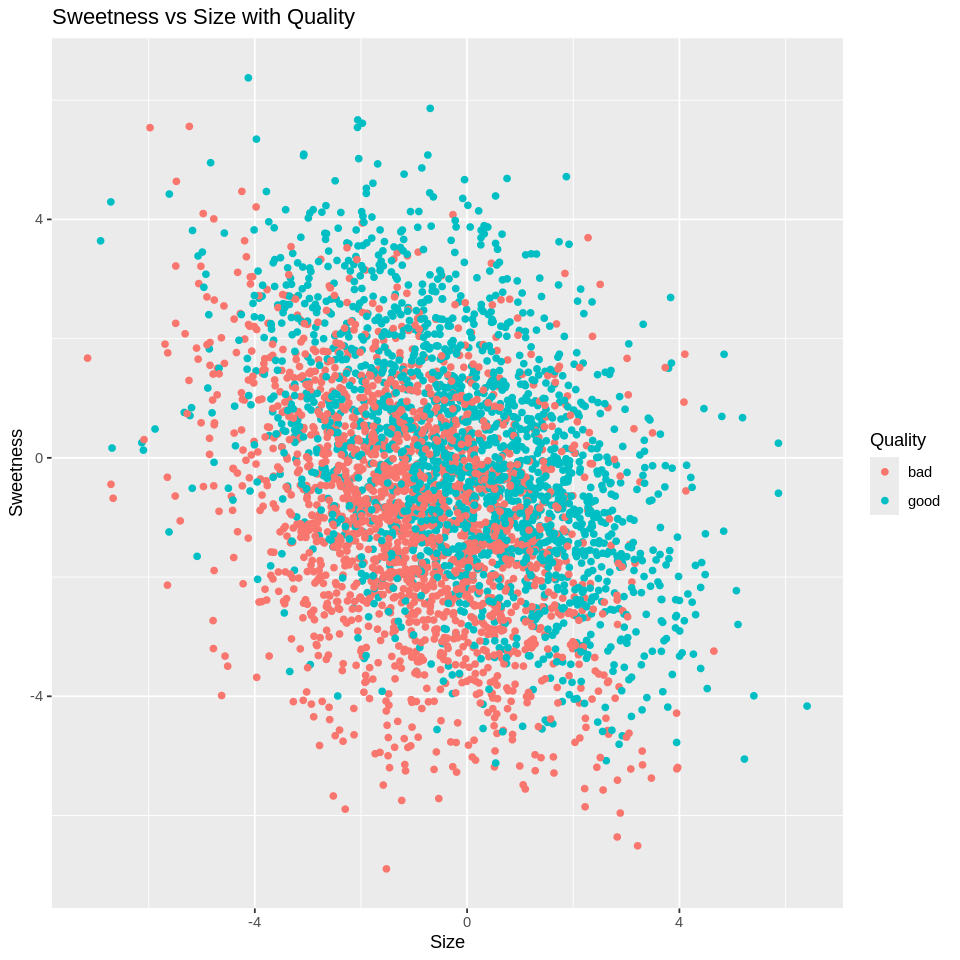

In [9]:
options(repr.plot.width = 8, repr.plot.height = 8)
Apple_plot <- Apple_data_wrangled|>
              ggplot(aes(x=Size, y=Sweetness, color= Quality)) + 
              geom_point() + 
              ggtitle("Sweetness vs Size with Quality")
Apple_plot

- Splitting dataset into training and testing data

In [10]:
set.seed(422)

apple_split <- initial_split(Apple_data_wrangled, prop=0.75, strata= Quality)
apple_train <- training(apple_split)
apple_test <- testing(apple_split)

**Discussion:**

-summarize what you found

-discuss whether this is what you expected to find?

-discuss what impact could such findings have?

-discuss what future questions could this lead to?

**References**

-At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).

-Make sure to cite the source of your data as well.

hint - you can use your proposal as a basis for your final report